In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
df=pd.read_csv('underwater_temperature.csv',encoding='latin-1')
df

,ID,Site,Latitude,Longitude,Date,Time,Temp (°C),Depth
0,1,Ilha Deserta,27.2706,48.3310,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.3310,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.3310,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.3310,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.3310,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
408633,408634,lha do Xavier,27.6092,48.3858,2013/03/07,09:03:29,24.931,5.0
408634,408635,lha do Xavier,27.6092,48.3858,2013/03/07,09:23:29,24.931,5.0
408635,408636,lha do Xavier,27.6092,48.3858,2013/03/07,09:43:29,24.931,5.0
408636,408637,lha do Xavier,27.6092,48.3858,2013/03/07,10:03:29,24.931,5.0


In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])

In [28]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [ ]:
df.drop('Time',axis=1,inplace=True)

In [25]:
df.drop('ID',axis=1,inplace=True)

In [31]:
df.drop('day',axis=1,inplace=True)

In [32]:
df.corr()

C:\Users\puzan12\AppData\Local\Temp\ipykernel_19948\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Latitude,Longitude,Temp (°C),Depth,year,month
Latitude,1.000000,0.245406,-0.230337,-0.028676,0.109466,-0.030698
Longitude,0.245406,1.000000,-0.108347,-0.258080,-0.142993,0.013994
Temp (°C),-0.230337,-0.108347,1.000000,-0.163394,0.237994,-0.342542
Depth,-0.028676,-0.258080,-0.163394,1.000000,0.293807,0.034039
year,0.109466,-0.142993,0.237994,0.293807,1.000000,-0.402348
month,-0.030698,0.013994,-0.342542,0.034039,-0.402348,1.000000


C:\Users\puzan12\AppData\Local\Temp\ipykernel_19948\3924407989.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


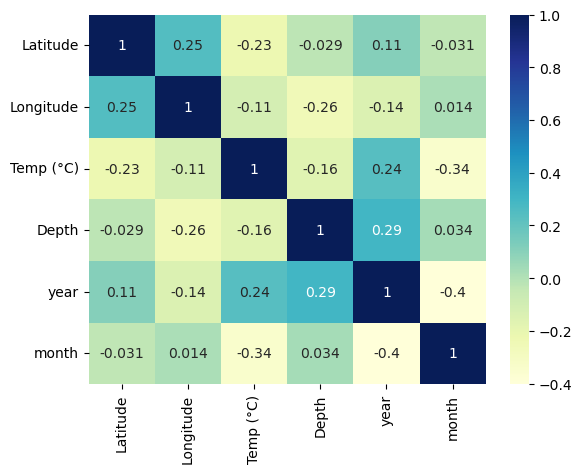

In [33]:

import seaborn as sb 
  

  
# plotting correlation heatmap 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
x=df[['month','year','Depth','Longitude','Latitude']].values
y=df['Temp (°C)'].values

In [66]:
df.fillna(df['Temp (°C)'].median(),inplace=True)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=0.20)

In [68]:
regressor=LinearRegression().fit(x_train,y_train)

In [69]:
regressor.predict(x_test)

array([17.95785958, 20.37068355, 21.73506386, ..., 22.34014478,
       20.67489091, 20.00517253])

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(regressor.predict(x_test), y_test)
r2 = r2_score(regressor.predict(x_test), y_test)

mse

6.704362857772799

In [71]:
r2

-2.0523190423926656

In [75]:
print(y_test[0],regressor.predict([x_test[0]]))

17.284 [17.95785958]


17.284